In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from modules import vascular_data as sv
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_opening, binary_closing, skeletonize_3d

In [2]:
IMAGE_PATH = '/home/marsdenlab/projects/vascular_data/OSMSC0110/OSMSC0110-cm.mha'

SPACING = 0.035

MIN_ = 120
MAX_ = 210

N_OPEN_CLOSE = 5

In [3]:
image = sv.read_mha(IMAGE_PATH)
image = sv.resample_image(image, SPACING)

image_np = sv.vtk_image_to_numpy(image)

image_thresh = image_np.copy()
image_thresh[(image_np > MAX_) | (image_np < MIN_)] = 0
image_thresh[(image_np <= MAX_) & (image_np >= MIN_)] = 1
print(image_np.shape)

# for i in range(N_OPEN_CLOSE):
#     print(i)
#     binary_opening(image_thresh, out=image_thresh)
#     binary_closing(image_thresh, out=image_thresh)
    
image_skel = skeletonize_3d(image_thresh)

(1141, 361, 1141)


/home/marsdenlab/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:137: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/marsdenlab/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:190: UserWarning: Downcasting int16 to uint8 without scaling because max value 1 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


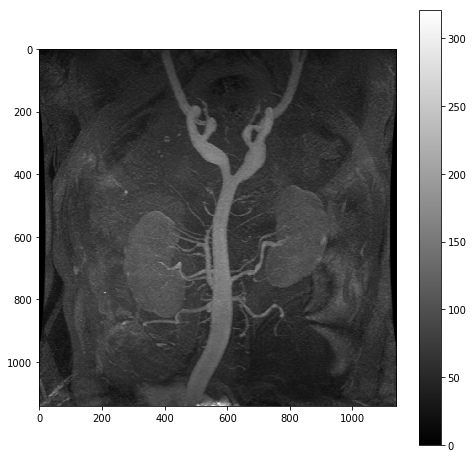

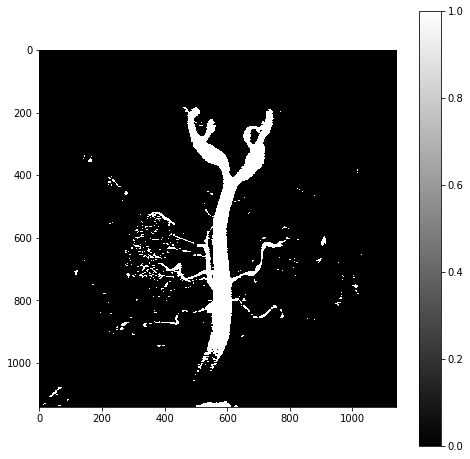

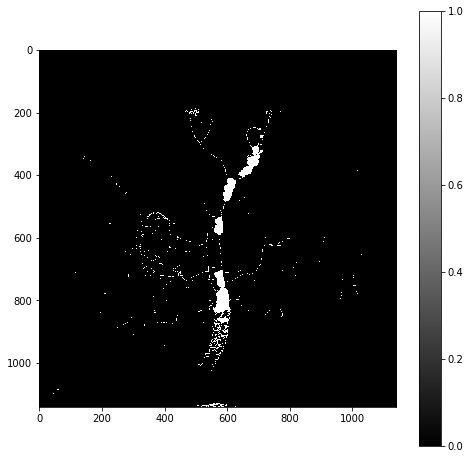

In [4]:
SLICE = 200

x = np.amax(image_np, axis=1)
y = np.amax(image_thresh, axis=1)
z = np.amax(image_skel,axis=1)

plt.figure(figsize=(8,8))
plt.imshow(x, cmap='gray')
plt.colorbar()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.imshow(y, cmap='gray')
plt.colorbar()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.imshow(z, cmap='gray')
plt.colorbar()
plt.show()
plt.close()

In [5]:
points = []
H,W,D = image_skel.shape
for i in range(H):
    for j in range(W):
        for k in range(D):
            if image_skel[i,j,k] > 0:
                points.append([i,j,k])
                
points = np.array(points)
print(points.shape)

(54223, 3)


<IPython.core.display.Javascript object>


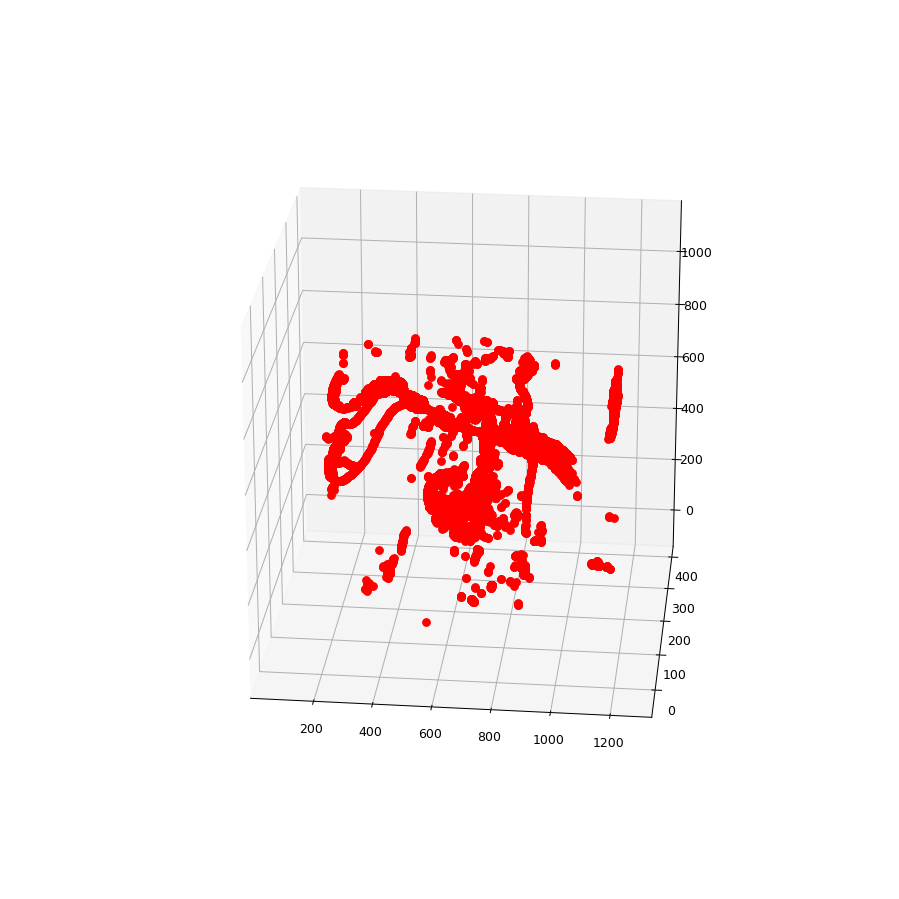

In [9]:
from mpl_toolkits import mplot3d
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot3D(points[:,0], points[:,1], points[:,2], color='r', marker='o', linestyle='')
    
plt.show()